In [1]:
from IPython.display import FileLink, FileLinks

# Model Trainen

### Model Keuze

Om te bepalen welk type model je gaat maken kijk je naar het doel van het project.

   - Moet het model objecten in een afbeelding classificeren? *(De gehele afbeelding als een klasse zien)* **Classification**
   - Moet het model objecten lokaliseren en identificeren? *(Klasse in de afbeelding vinden en de locatie daarvan)* **Detection**
   - Moet het model elke pixel van een afbeelding classificeren in een bepaald segment? *(Is elke pixel in de afbeelding van belang?)* **Segmentation**

Wanneer je een nieuw model wilt opbouwen is het goed om eerst naar soort gelijke projecten te kijken om te zien wat werkt. In het algemeen is de beste keuze om gebruik te maken van een pre-trained model die al kennis heeft over je klasse. Neem als voorbeeld ResNet50, een imagenet model wat getraind is op 1000 klasse: [imagenet-classes.txt](https://raw.githubusercontent.com/BigWZhu/ResNet50/refs/heads/master/imagenet-classes.txt)

Door zo'n voorgetraind model te nemen weet je dat de architectuur correct is voor soortgelijke opdrachten. Verder bezitten de weights al informatie over je mogelijke targets/doel klasse, dit kan het train proces een stuk sneller maken doordat het niet vanaf 0 begint. (Dit principe wordt ook transfer learning genoemd.)

Bekijk onderstaande notebook voor vragen die kunnen helpen met het maken van een keuze tussen welke pre-trained model / structuur.

In [8]:
FileLink('model keuze.ipynb')

E:\Studie\Stage\Computer-Vision-Showcase-SUPERP\informatie\model keuze.ipynb

### Hyperparameters 
Loss, optimizers en evaluatiemetrics

Op het moment dat je de model keuze hebt gemaakt is het tijd voor de hyperparameters, dit zijn de verschillende functies / methodes die het model achter de schermen laten runnen. Dit is vaak ook het deel waar verschillende opties worden geprobeerd voor het behalen van een beter of sneller resultaat. Weet wel dat op het moment dat de data en het resultaat niet goed is dat het aanpassen van de hyperparameters dit niet toch succesvol kan maken. Zie dit meer als het bijsleutelen van het model.

#### Loss Function

De criterion of vaker genoemde loss function houdt de afwijking van het model bij, specifieker de afstand tussen het voorspelde antwoord en het correcte antwoord op basis van een formule. Modellen en doeleindes verschillen zo dus ook de loss functions. Het is mogelijk onderzoek te doen naar welke loss function optimaal is voor huidige doeleindes maar raad dit af. Dit process is ook goed te doen door middel van het resultaat testen, ChatGPT vragen of na het bepalen van een optimizer een goed bijpassende loss function te kiezen.

[Diepere uitleg werking loss-function](https://www.datacamp.com/tutorial/loss-function-in-machine-learning)  -  [Veel voorkomende loss-functions](https://builtin.com/machine-learning/common-loss-functions)

##### Standaard Loss functions

1. **Image Classification:**
   - **Categorical Cross-Entropy:** Wordt vaak gebruikt bij meerklasse-classificatieproblemen.
   - **Binary Cross-Entropy:** Wordt gebruikt voor tweetalige classificatieproblemen.

[Cross-Entropy](https://365datascience.com/tutorials/machine-learning-tutorials/cross-entropy-loss/)

2. **Object Detectie:**
   - **Focal Loss:** Helpt bij het omgaan met klassenonevenwicht door moeilijkere voorbeelden te benadrukken.
   - **Intersection over Union Loss:** Wordt soms gebruikt om de nauwkeurigheid van boksvoorstellen te verbeteren.
   - **Smooth L1 Loss:** Wordt gebruikt in modellen zoals Faster R-CNN voor coördinatieregressie.
   - **YOLO Loss en SSD Loss:** Specifieke combinaties van classificatie- en regressieverliezen die worden gebruikt in respectievelijk YOLO- en SSD-modellen.

[YOLO Loss Explained](https://stats.stackexchange.com/questions/287486/yolo-loss-function-explanation)

3. **Segmentatie:**
   - **Soft Dice Loss:** Populair in medische beeldsegmentatie, met name bij onevenwichtige klassen.
   - **Jaccard Loss (Intersection over Union Loss):** Wordt soms gebruikt voor pixelwijzematchingscores.
   - **Cross-Entropy Loss:** Wordt vaak gebruikt in semantische segmentatietaken voor pixelwijze classificatie.

#### Optimizer

In Machine Learning projecten spelen optimizers in het algemeen een cruciale rol bij het trainen van modellen. De keuze voor een specifieke optimizer kan afhangen van verschillende factoren, inclusief de aard van de dataset, het model, en de gewenste balans tussen snelheid en nauwkeurigheid. Bekijk onderstaande video's voor een beter begrip over de werking van een optimizer.

[3Blue 1Brown: Gradient Descent how Neural Networks learn](https://www.youtube.com/watch?v=IHZwWFHWa-w) - [Gradient Descent - 3 minutes](https://www.youtube.com/watch?v=qg4PchTECck)

Hier zijn enkele standaardopties voor optimizers en overwegingen waarom je welke zou gebruiken:

**Adam (Adaptive Moment Estimation):**

[Adam Explained](https://builtin.com/machine-learning/adam-optimization)
   - **Standaard Opties:** Goed gedefinieerde standaard parameters (\(\beta_1 = 0.9\), \(\beta_2 = 0.999\)), die meestal goede prestaties leveren zonder veel tuning.
   - **Overwegingen:** Adam is vaak de eerste keuze als je snel resultaten wilt krijgen zonder veel tufines. Het combineert de voordelen van twee andere veelgebruikte methodes: AdaGrad en RMSProp.

**Stochastic Gradient Descent (SGD):**

[Stochastic Gradient Descent Explained](https://towardsdatascience.com/stochastic-gradient-descent-clearly-explained-53d239905d31)
   - **Standaard Opties:** Vaak gebruikt met momentum, wat helpt om oscillaties (het heen en weer bewegen tussen twee uiterste waardes - vaak tezien in de loss) tijdens het trainen te verminderen en een snellere convergentie (het punt waarop de voorspellingen van het model niet meer verbeteren, of de loss constant wordt) te bereiken.
   - **Overwegingen:** SGD met momentum is geschikt voor grote datasets en situaties waar je de convergentie fijn wilt afstemmen. Het vereist handmatige tuning van de leersnelheid, wat zowel een nadeel als een voordeel kan zijn.

**AdaGrad:**
   - **Standaard Opties:** Past de leersnelheid aan voor elke parameter op basis van de som van de vierkanten van alle voorgaande gradients.
   - **Overwegingen:** Goed voor zeldzame en sprankelende kenmerken, maar kan problematisch worden als de leersnelheid te veel daalt.

**RMSProp:**

[RMSProp Explained](https://www.datacamp.com/tutorial/rmsprop-optimizer-tutorial)
   - **Standaard Opties:** Houdt een bewegend gemiddelde van de vierkante gradients bij, en deelt door de wortel van deze gemiddelde waarde.
   - **Overwegingen:** Ontwikkeld om de valkuilen van AdaGrad op te lossen, en werkt goed voor niet-stationaire doelen, wat vaak het geval is in real-world deep learning.

**AdamW:**
   - **Standaard Opties:** Een variant van Adam met decoupled weight decay. Dit voorkomt problemen die voortkomen uit de standaard L2 regularisatie in Adam.
   - **Overwegingen:** Helpt bij de algemene generalisatie en convergentie en is vaak beter bij het trainen van transformer-gebaseerde modellen.

**Nesterov Accelerated Gradient (NAG):**
   - **Standaard Opties:** Een variatie van momentum-gebaseerde methodes die verder moet helpen om sneller te convergeren.
   - **Overwegingen:** Het kan nuttig zijn voor zeer diepe netwerken vanwege hun abiliteit om zijn horizon van leersnelheden voor elke parameter aan te passen.

##### Overwegingen bij het kiezen van een optimizer:

- **Niet-lineaire datasets:** Opties zoals Adam helpen met het leren van complexe patronen door dynamische aanpassingen van de leersnelheid.
- **Rekenkosten:** Simpele optimizers zoals SGD kunnen efficiënter zijn in termen van geheugen en snelheid op heel grote datasets.
- **Tuning-behoeften:** Sommige optimizers zoals Adam vereisen minder hyperparameter tuning, terwijl optimizers zoals SGD aanzienlijke moeite kunnen vereisen om ze goed te tunen.
- **Generalisatie:** Weight decay en optimizerkeuzes zoals AdamW kunnen helpen om overfitting te beperken en beter te generaliseren naar testdata.

Bij het kiezen van een optimizer, moet je ook overwegen wat historisch goed heeft gewerkt voor vergelijkbare taken en modellen binnen jouw specifieke domein. Het kan nuttig zijn om met verschillende optimizers te experimenteren om te zien welke het beste presteert in jouw specifieke situatie.

#### Metrics

Tijdens het trainen zijn er verschillende evaluatie metrics om in de gaten te houden. Bij image detection komen er nog een paar bij, deze worden in het `Image Detection` deel behandeld.
Bij image classification zijn verschillende metrics die je kunt gebruiken om de prestaties van je model te evalueren. Hier zijn de meest voorkomende:

1. **Accuracy**: Dit meet het percentage correcte voorspellingen over alle voorbeelden. Hoewel het nuttig is, kan het misleidend zijn in geval van een scheve klassenverdeling.

2. **Precision**: Dit is het percentage daadwerkelijke positieve voorspellingen uit alle positieve voorspellingen. Het is vooral nuttig als de kosten van vals-positieven hoog zijn.

3. **Recall (of Sensitivity)**: Dit is het percentage correcte positieve voorspellingen uit alle daadwerkelijke positieve gevallen. Het is cruciaal wanneer de kosten van gemiste positieve voorbeelden hoog zijn.

4. **F1-score**: Dit is het harmonisch gemiddelde van precision en recall. Het is nuttig wanneer je een balans wilt vinden tussen precision en recall, vooral bij een ongelijke klassenverdeling.

5. **Confusion Matrix**: Dit is een tabel die de prestaties van een classificatiemodel laat zien, met de werkelijke klassen tegenover de voorspelde klassen. Het geeft inzicht in correct geclassificeerde en verkeerd geclassificeerde voorspellingen.

Deze metrics helpen je verschillende aspecten van je modelprestaties te begrijpen, en de keuze van welke te gebruiken hangt vaak af van de specificiteiten en eisen van je project. Zo is voor een toezicht systeem `precision` van hoger belang voor het voorkomen van false positives. Bij het herkennen van tumors is `recall` belangrijker aangezien false negatives veel schadelijker zijn dan false positives. Bepaal opbasis van wat voor jou model het handigst op welke metrics je het meest gaat letten.  In het geval je het zo simpel mogelijk voor jezelf wilt maken let dan op de `F1-score`.

#### Trainingsprocedure

Tijdens het train proces krijg je altijd te maken met batch size en epochs, dit zijn de hoeveelheid afbeeldingen voor het model de weights aanpast en het totaal aantal keer dat het model door de hele trainings data heen gaat. [Verdere uitleg](https://www.sabrepc.com/blog/Deep-Learning-and-AI/Epochs-Batch-Size-Iterations)

Om niet zelf het aantal epochs te hoeven bepalen en zo mogelijk het proces te vroeg of laat te stoppen kan je gebruik maken van [early stopping](https://cyborgcodes.medium.com/what-is-early-stopping-in-deep-learning-eeb1e710a3cf) en/of [learning rate scheduler](https://neptune.ai/blog/how-to-choose-a-learning-rate-scheduler)

__Kort om__:
- __Batch size en epochs__: Kies de juiste batchgrootte die past bij de hoeveelheid beschikbare GPU/CPU-kracht, dit is standaard 32. Dan trainen we met voldoende epochs om een goede generalisatie te bereiken.
- __Early stopping__: Dit is het bijhouden van de loss op de validatie set, als deze een aantal epochs niet verbeterd. We gebruiken early stopping om overfitting te voorkomen. 
- __Learning rate scheduling__: Gebruik een learning rate scheduler (bijv. reduce on plateau) om de learning rate automatisch aan te passen wanneer de prestaties stagneren.

### Image Classification

Dit type modellen zoals de naam al zegt probeert verschillende klasse te kunnen classificeren op basis van een volledige afbeelding. 

Bekijk zo eerst een vd minimale modellen om de structuur door te krijgen voor we meer geavanceerde methodes gaan gebruiken.

In [27]:
# Pre-trained ResNet50 - Zonder extra toevoegingen
FileLink('Model Training\\ResNet50_basics.ipynb')

E:\Studie\Stage\Computer-Vision-Showcase-SUPERP\informatie\Model Training\ResNet50_basics.ipynb

In onderstaande notebook werken we ook een ResNet50 model uit. Maar in dit geval hebben we toevoegingen gedaan om overfitting tegen te gaan.

In [29]:
# Pre-trained ResNet50 - Onderbouw keuzes 
FileLink('Model Training\\ResNet50.ipynb')

E:\Studie\Stage\Computer-Vision-Showcase-SUPERP\informatie\Model Training\ResNet50.ipynb

### Image Detection

Bij image detection wordt een object in de afbeelding gevonden ipv dat de hele afbeelding als het object of de klasse wordt gezien. Dit heeft verschillende effecten als een andere structuur voor de data en het model, de benodigde hoeveelheid data, trainingstijd maar vooral ook het resultaat van het model. 


#### Hoe werkt Image Detection?

Image detection is een tak van computer vision die zich richt op het niet alleen classificeren van objecten binnen een afbeelding, maar ook op het lokaliseren ervan. Deze technologie wordt ingezet om verschillende objecten in een afbeelding te identificeren en hierbij de positie (vaak door middel van bounding boxes) aan te geven. In vergelijking met image classification, waarbij er slechts één label voor de gehele afbeelding wordt gegenereerd, genereert image detection meerdere labels en bijbehorende coördinaten.


De gangbare methoden voor image detection maken gebruik van deep learning-technieken, met name convolutional neural networks (CNN's), die zeer effectief zijn in het herkennen van visuele patronen. Enkele populaire algoritmen voor image detection zijn:

- **Region-based Convolutional Neural Networks (R-CNN):** Dit algoritme maakt regio-voorstelmethoden om potentiële gebieden met objecten te identificeren en voert dan conventionele beeldclassificatie uit op elk van deze gebieden.
- **Fast R-CNN en Faster R-CNN:** Verbeteringen op het originele R-CNN die de snelheid van detectie verbeterden door het deel van het proces dat verantwoordelijk is voor regio voorstellen te versnellen.
- **You Only Look Once (YOLO):** Een single-stage detector die de afbeelding in één keer verwerkt en objecten lokaliseert en classificeert, waardoor het aanzienlijk sneller werkt.
- **Single Shot MultiBox Detector (SSD):** Een andere single-stage methode die de efficiëntie en snelheid verhoogt zonder veel precisie op te offeren.

#### Bounding Boxes en Labels Gedetailleerd

Bounding boxes spelen een cruciale rol bij het speciferen van de locatie en grootte van objecten binnen een afbeelding, en elke bounding box komt met specifieke informatie:
- **Coördinaten:** Elke bounding box wordt meestal gedefinieerd door een set van vier coördinaten. Dit kan zijn de linkerbovenhoek van de rechthoek (x_min, y_min) en de rechteronderhoek (x_max, y_max), of de linkerbovenhoek (x, y), de breedte (width), en de hoogte (height).
- **Classificatie-Labels:** Samen met de coördinaten bevat elke bounding box een label dat de klasse van het object binnen de kaders aangeeft. Bijvoorbeeld, als een afbeelding een kat en een hond bevat, kan een bounding box rond de kat het label 'kat' hebben en een andere box rond de hond het label 'hond'.
- **Voorspellende Waarschijnlijkheden:** Elke bounding box heeft een bijbehorende waarschijnlijkheid of score, die aangeeft hoe zeker het model is dat het object binnen die box tot een bepaalde klasse behoort. Deze score helpt bij het filteren van onzekere of onjuiste voorspellingen.


#### Image Detection Exclusieve Metrics

Verschillende evaluatiemetrieken zijn exclusief voor image detection en houden rekening met zowel de nauwkeurigheid van classificatie als lokalisatie. Enkele van de belangrijkste metrics zijn:

- **Intersection over Union (IoU):** Een maatstaf die de overlap tussen de voorspelde bounding box en de ground truth bounding box berekent. Het is de verhouding van de overlap boven de velden van beide sets van coördinaten. Hoe hoger de IoU-waarde, hoe preciezer de lokalisatie van het object.
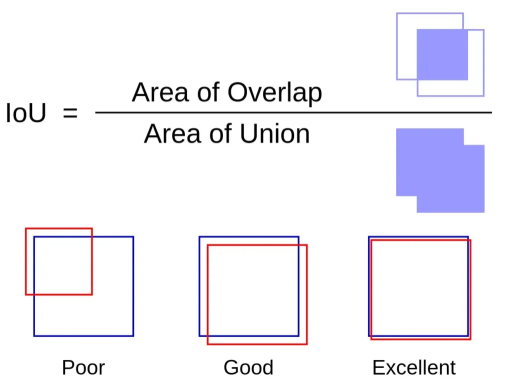

- **Mean Average Precision (mAP):** is een evaluatiecriterium dat wordt gebruikt om de prestaties van objectdetectie-algoritmen te meten. Het combineert zowel hoe goed het model objecten kan lokaliseren als hoe goed het deze objecten kan herkennen. Om mAP te begrijpen, is het handig om de concepten van **Precisie** (Hoeveel van de objecten die jouw model als "gevonden" beschouwt ook correct zijn.) en **Recall** (Hoeveel van de werkelijk aanwezige objecten in de afbeelding door je model zijn gevonden.) te begrijpen.

mAP bouwt voort op deze ideeën door het gemiddelde van de precisie te berekenen over verschillende niveaus van recall, en het resultaat is een enkele score die zowel de precisie als de recall van een model over alle klassen die het moet detecteren, weerspiegelt. Dus, een hogere mAP wijst doorgaans op een beter presterend model. [Meer informatie over mAP](https://xailient.com/blog/what-is-mean-average-precision-and-how-does-it-work/)

#### YOLO Model

Over de loop van het stage project zijn meerdere YOLO modellen ontwikkeld met de hulp van [ultralytics](https://docs.ultralytics.com/) aangezien je hierbij werkt vanuit de [github repository van ultralytics](https://github.com/ultralytics/ultralytics) en is gelukkig al erg goed gedocumenteerd in de [quickstart](https://docs.ultralytics.com/quickstart/#install-ultralytics). In onderstaande notebook hebben we op deze wijze meerdere YOLOv5 modellen getraint (helaas is deze code dus momenteel onbruikbaar).

In [33]:
FileLink('..\\code\\Training YOLO model.ipynb')

E:\Studie\Stage\Computer-Vision-Showcase-SUPERP\code\Training YOLO model.ipynb

### Image Segmentation
De laatste methode is Image segmentation hierbij behoort elke pixel tot een klasse. Het kan gebruik gemaakt worden als alleen staand model voor herkenning, het doen van berekeningen op basis van afbeeldingen maar ook ter ondersteuning van Image Detection modellen. Tijdens deze stage zijn we niet in gegaan op Image Segmentation. Maar als je dit wel wilt doen is hier een [Image Segmentation guide en best practices](https://encord.com/blog/image-segmentation-for-computer-vision-best-practice-guide/)